In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
app = pd.read_csv("Assignment_Data/appearances.csv")
club_games = pd.read_csv("Assignment_Data/club_games.csv")
clubs = pd.read_csv("Assignment_Data/clubs.csv")
competitions = pd.read_csv("Assignment_Data/competitions.csv")
game_events = pd.read_csv("Assignment_Data/game_events.csv")
game_lineaps = pd.read_csv("Assignment_Data/game_lineups.csv")
games = pd.read_csv("Assignment_Data/games.csv")
player_valutations = pd.read_csv("Assignment_Data/player_valuations.csv")
players = pd.read_csv("Assignment_Data/players.csv")

H3 percentuale di vittoria

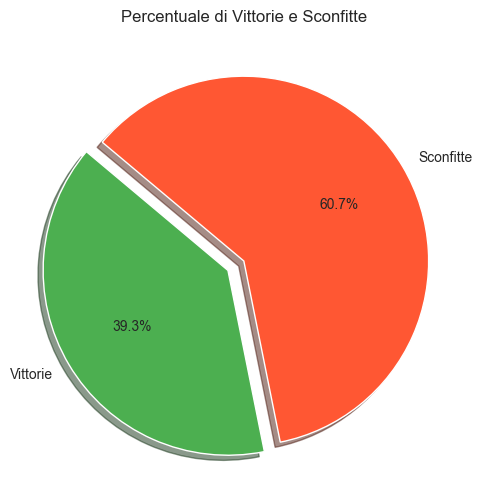

In [15]:
df=pd.read_csv("Assignment_Data/club_games.csv")
df.head()
total_wins=df['is_win'].sum()
total_loss=len(df)-total_wins
labels = ['Vittorie', 'Sconfitte']
sizes = [total_wins, total_loss]
colors = ['#4CAF50', '#FF5733']
explode = (0.1, 0)  # "esplodere" la fetta delle vittorie
# Creare il grafico a torta
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentuale di Vittorie e Sconfitte')
plt.show()

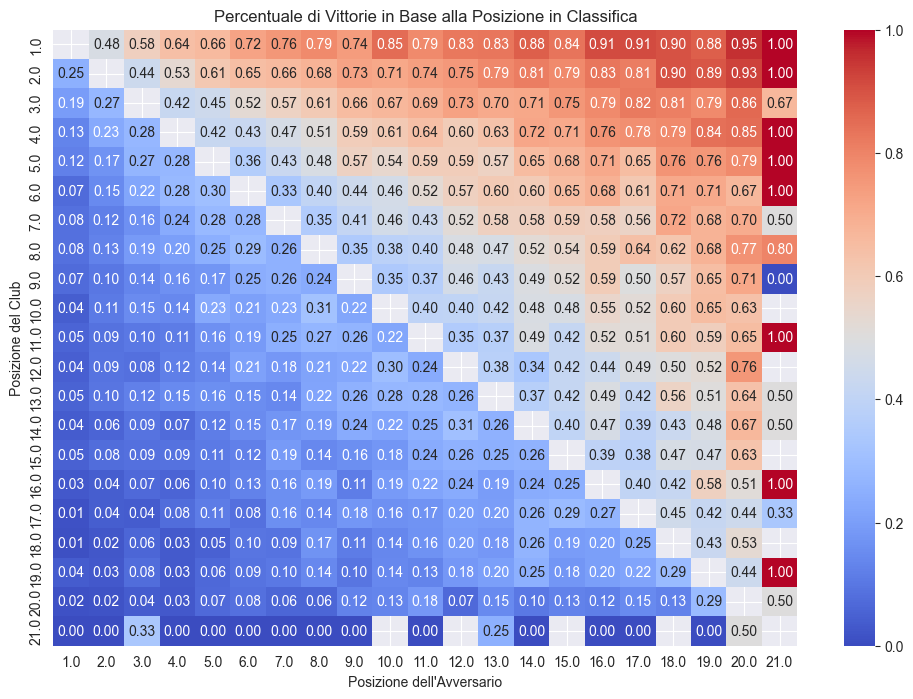

In [19]:
df['win'] = df['is_win'].astype(int)
pivot_table = df.pivot_table(values='win', index='own_position', columns='opponent_position', aggfunc='mean')
# Creare la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Percentuale di Vittorie in Base alla Posizione in Classifica')
plt.xlabel('Posizione dell\'Avversario')
plt.ylabel('Posizione del Club')
plt.show()

In [22]:
# Rimuovere i giocatori che non hanno un valore di mercato
players_df = players.dropna(subset=['market_value_in_eur'])

# Visualizzare il numero di righe prima e dopo la pulizia
print(f"Numero di righe originali: {len(players)}")
print(f"Numero di righe dopo la pulizia: {len(players_df)}")

Numero di righe originali: 30302
Numero di righe dopo la pulizia: 19383


Prime righe del DataFrame pulito:
    player_id first_name  last_name             name  last_season  \
7        4042       Brad      Jones       Brad Jones         2017   
33       8187     Juanmi   Callejón  Juanmi Callejón         2012   
72      18922      Karim    Benzema    Karim Benzema         2022   
89      22860     Jesper     Hansen    Jesper Hansen         2023   
93      23365        NaN  Reginaldo        Reginaldo         2012   

    current_club_id      player_code country_of_birth city_of_birth  \
7               234       brad-jones        Australia      Armadale   
33             2672  juanmi-callejon            Spain        Motril   
72              418    karim-benzema           France          Lyon   
89              678    jesper-hansen          Denmark     Slangerup   
93             1387        reginaldo           Brazil       Jundiaí   

   country_of_citizenship  ...   foot height_in_cm market_value_in_eur  \
7               Australia  ...   left        194.0